In [95]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [124]:
#importing libararies
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [125]:
df=pd.read_csv("Schottky_Single_Raw.csv")
pd.set_option('display.max_columns', None)
df


,tr_ref,wafer_layout,erf_num,wafer_id,test_date,test_comments,location,test_type,device_type,chip_name,dev_name,device_instance,device_id,x_reticle,y_reticle,x_reticle_size,y_reticle_size,x_actual,y_actual,x_test,y_test,sweep_number,r_dist,va_Voltage,ia_Current,length,overlap,size,SubDevice,width
0,5436,0520-01,5686,40652,2021-09-09T16:06:17Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_3sur,Dev_SchottSgl3sur_M100,2893641,11128,0,94.5,22.05,21.1,9.292,95.5165,9.5,95.25,1,95.967406,-2.00,-1.385000e-09,5,-1.000000e-07,5x5,A,5
1,5436,0520-01,5686,40652,2021-09-09T16:06:17Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_3sur,Dev_SchottSgl3sur_M100,2893641,11128,0,94.5,22.05,21.1,9.292,95.5165,9.5,95.25,1,95.967406,-1.75,-1.170000e-09,5,-1.000000e-07,5x5,A,5
2,5436,0520-01,5686,40652,2021-09-09T16:06:17Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_3sur,Dev_SchottSgl3sur_M100,2893641,11128,0,94.5,22.05,21.1,9.292,95.5165,9.5,95.25,1,95.967406,-1.50,-9.787000e-10,5,-1.000000e-07,5x5,A,5
3,5436,0520-01,5686,40652,2021-09-09T16:06:17Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_3sur,Dev_SchottSgl3sur_M100,2893641,11128,0,94.5,22.05,21.1,9.292,95.5165,9.5,95.25,1,95.967406,-1.25,-7.832000e-10,5,-1.000000e-07,5x5,A,5
4,5436,0520-01,5686,40652,2021-09-09T16:06:17Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_3sur,Dev_SchottSgl3sur_M100,2893641,11128,0,94.5,22.05,21.1,9.292,95.5165,9.5,95.25,1,95.967406,-1.00,-6.152000e-10,5,-1.000000e-07,5x5,A,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162619,5436,0520-01,5686,40670,2021-09-09T20:51:57Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_1,Dev_SchottSgl1_M400,2917652,11091,-44,-31.5,22.05,21.1,-35.305,-40.9840,-35.5,-41.25,1,54.093727,-1.00,-5.828000e-11,10,-4.000000e-07,10x10,D,10
162620,5436,0520-01,5686,40670,2021-09-09T20:51:57Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_1,Dev_SchottSgl1_M400,2917652,11091,-44,-31.5,22.05,21.1,-35.305,-40.9840,-35.5,-41.25,1,54.093727,-1.25,-7.754000e-11,10,-4.000000e-07,10x10,D,10
162621,5436,0520-01,5686,40670,2021-09-09T20:51:57Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_1,Dev_SchottSgl1_M400,2917652,11091,-44,-31.5,22.05,21.1,-35.305,-40.9840,-35.5,-41.25,1,54.093727,-1.50,-9.843000e-11,10,-4.000000e-07,10x10,D,10
162622,5436,0520-01,5686,40670,2021-09-09T20:51:57Z,PCM Schotky Diode Pre RDL,Explorer 1,Diode,Schottky,Chip_0v1_Schott_sgl_1,Dev_SchottSgl1_M400,2917652,11091,-44,-31.5,22.05,21.1,-35.305,-40.9840,-35.5,-41.25,1,54.093727,-1.75,-3.779000e-11,10,-4.000000e-07,10x10,D,10


In [126]:
df['wafer_id'].value_counts()

40652    23232
40655    23232
40658    23232
40661    23232
40664    23232
40667    23232
40670    23232
Name: wafer_id, dtype: int64

In [127]:
df['size'].value_counts()

5x5      47124
20x20    46200
10x10    46200
14x14    23100
Name: size, dtype: int64

In [128]:
global gpu
global fil
gpu = ['P100','P200','M100','M400']
fil = {'a':[],'b':[],'c':[],'d':[]}

class data:
    def __init__(self, size, ID):
        self.size = size
        self. ID = ID
        i = 0
        for names in fil: 
            for entities in fil:
                entities = (df['size']==f'{size}') & (df['wafer_id']==ID) & (df['dev_name'].str.contains(f'{gpu[i]}',na=False))
                fil[names] = df[entities]
            i+=1
    def plot():
        j = 0
        for x in fil:            
            i=(fil[x]['ia_Current'].abs())

            fig, ax = plt.subplots()

            ax.plot(fil[x].va_Voltage,i)
            ax.set_xlabel('Voltage')
            ax.set_ylabel('log[Current]')
            ax.set_yscale('log')
            ax.set_ylim(0.00000000000001,0.01)


            ax.set_xlim(-2.2,2.2)
            plt.style.use('ggplot')
            plt.title(f"{gpu[j]} of size {size} of wafer {ID} ")
            plt.show()
            j+=1



In [131]:
size = input('enter your size>>>>>>')
ID = int(input('enter your ID>>>>>>'))
x = data(size, ID)

enter your size>>>>>> 20x20
enter your ID>>>>>> 40658    


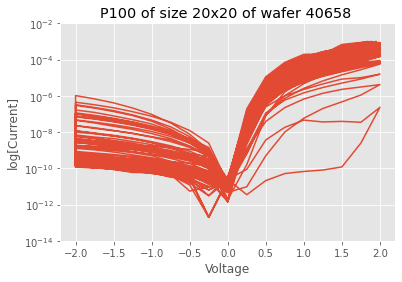

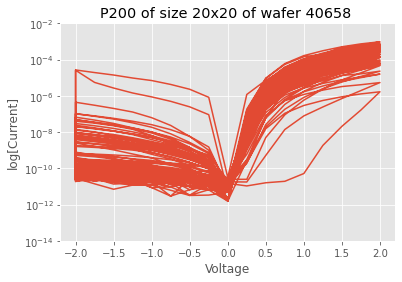

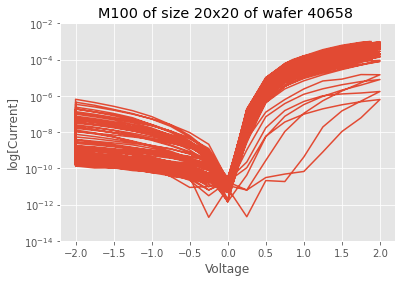

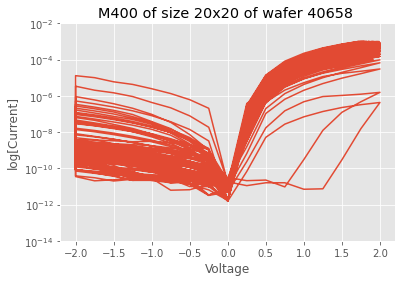

In [132]:
data.plot()